<a href="https://colab.research.google.com/github/FacuRoffet99/ML/blob/main/TP7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LassoCV
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.manifold import TSNE

# Carga y preprocesamiento de datos

In [11]:
# Cargar dataset
boston = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
# Ver si hay valores nulos: hay algunos
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [13]:
# Rellenar los valores nulos con una interpolación
boston = boston.interpolate()
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


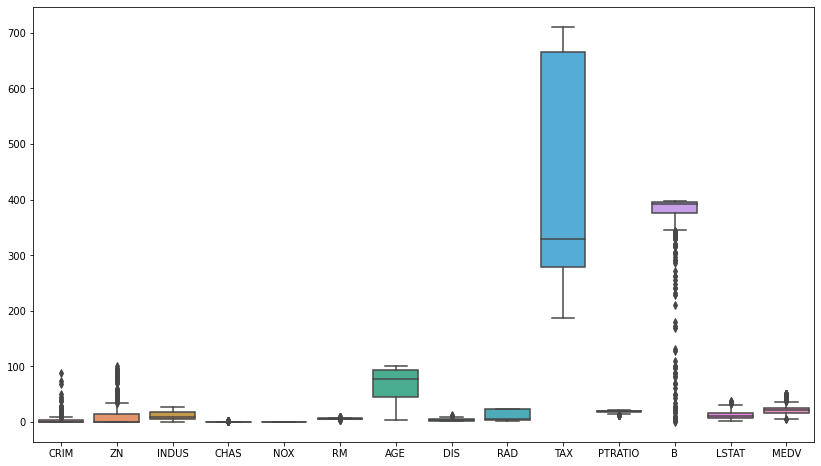

In [14]:
# Ver si hay outliers: hay unos cuantos
plt.figure(figsize = (14, 8))
sns.boxplot(data = boston, width = 0.8)
plt.show()

In [15]:
# Dividir en datos y etiquetas
y = boston["MEDV"]
X = boston.drop(["MEDV"],axis=1)

# Escalar los datos para reducir efecto de outliers
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(X), columns=X.columns)

# Dividir en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Modelo base
Sirve para tener con qué comparar a los demás modelos.

In [16]:
# Entrenar el modelo
model = LassoCV(cv=4, max_iter=10000)
model.fit(X_train,y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas
print("MAE =", metrics.mean_absolute_error(y_test, y_pred))
print("MSE =",metrics.mean_squared_error(y_test, y_pred))
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE = 3.671328773421702
MSE = 31.19137799603775
RMSE = 5.584924171019491


# Selección de atributos
Para ver si se pueden mejorar los resultados del modelo base, se eliminaron las features que menos importancia tenían a la hora de realizar las predicciones. El resultado no fue favorable ya que las métricas empeoraron, lo cuál posiblemente se deba a que el dataset no tiene una dimensionalidad lo suficientemente grande para aplicar esta técnica. 

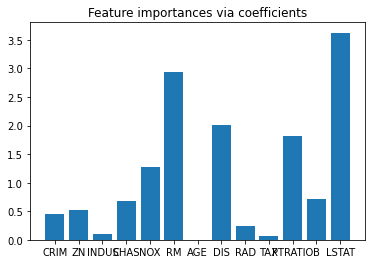

In [17]:
# Ver importancia de las features
lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)
feature_names = np.array(X.columns)

# Graficar importancia
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [18]:
# Elijo las features que tengan más del 5% de importancia
threshold = sum(importance)*0.05

sfm = SelectFromModel(lasso, threshold=threshold).fit(X, y)
important_features = feature_names[sfm.get_support()]
important_features

array(['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype=object)

In [19]:
# Me quedo con las features seleccionadas
X_train_sel = X_train[important_features]
X_test_sel = X_test[important_features]

# Entrenar el modelo
model = LassoCV(cv=4, max_iter=10000)
model.fit(X_train_sel,y_train)

# Predicciones
y_pred = model.predict(X_test_sel)

# Métricas
print("MAE =", metrics.mean_absolute_error(y_test, y_pred))
print("MSE =",metrics.mean_squared_error(y_test, y_pred))
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE = 3.9270097006404856
MSE = 35.22465111065387
RMSE = 5.935035898008863


# tSNE
Si bien este modelo no sirve para obtener mejores predicciones, es de utilidad para visualizar el dataset. En los resultados se observa que claramente los datos están agrupados en diferentes clusters.


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


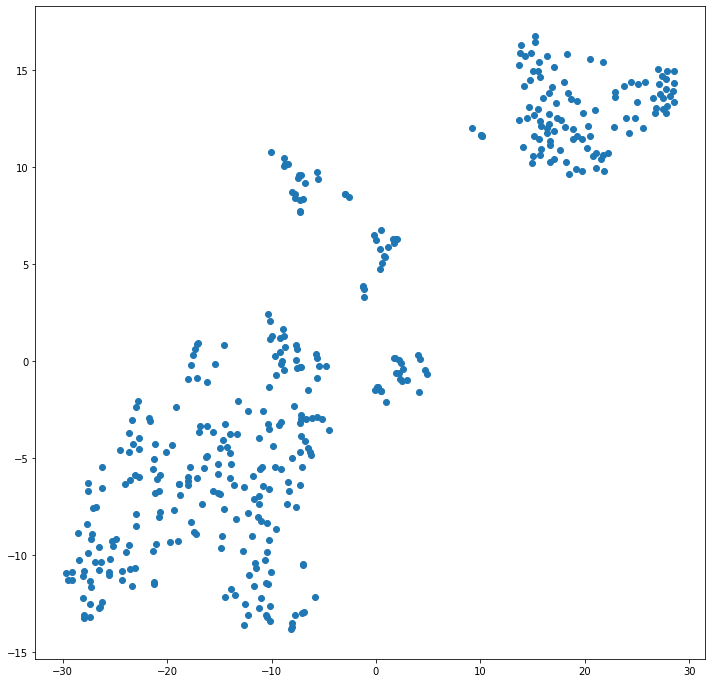

In [20]:
# Reducir a 2 dimensiones con tSNE (para poder visualizar el dataset)
tsne = TSNE(n_components=2, init='pca', n_iter = 30000, perplexity = 40)
X_embedded = tsne.fit_transform(X_train)

# Graficar
fig = plt.figure(figsize=(12,12))
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


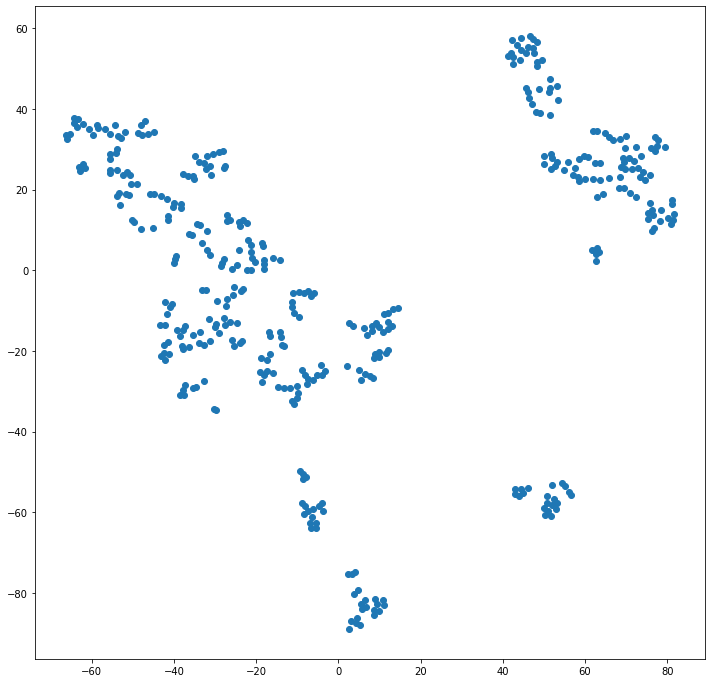

In [21]:
# Mismo análisis pero con un valor de perplejidad menor
tsne = TSNE(n_components=2, init='pca', n_iter = 30000, perplexity = 10)
X_embedded = tsne.fit_transform(X_train)

# Graficar
fig = plt.figure(figsize=(12,12))
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.show()